## Exploratory Data Analysis for Data Science Jobs in the UK


In [51]:
# import libararies
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter for UK Data Analyst roles

In [67]:
df_DA_UK = df[(df['job_title_short'].isin(['Data Analyst', 'Data Engineer', 'Data Scientist'])) & (df['job_country'] == 'United Kingdom')].copy()


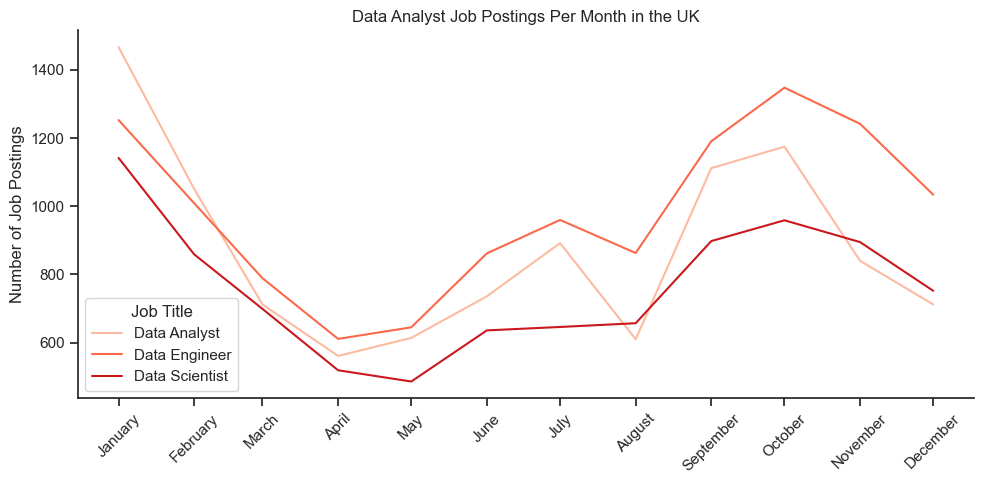

In [70]:
df_DA_UK['job_posted_month'] = df_DA_UK['job_posted_date'].dt.to_period('M').dt.to_timestamp()

monthly_job_counts = df_DA_UK.groupby(['job_posted_month', 'job_title_short']).size().reset_index(name='count')

sns.set_theme(style="ticks")
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_job_counts, x='job_posted_month', y='count', hue='job_title_short', palette='Reds', legend=True)
sns.despine()

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%B'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

plt.title('Data Analyst Job Postings Per Month in the UK')
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()

### Locations to Explore

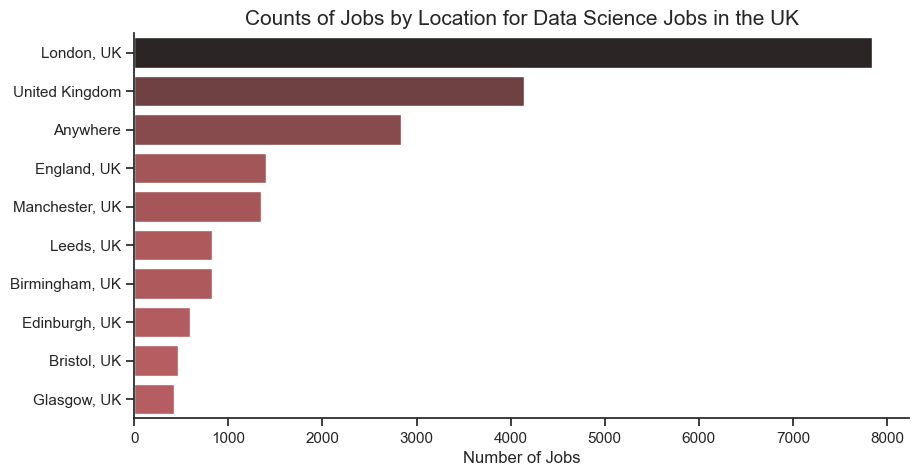

In [74]:
df_UK_plot = df_DA_UK['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
plt.figure(figsize=(10, 5))
sns.barplot(data=df_UK_plot, x='count', y='job_location', hue='count', palette='dark:r_r', legend=False)
sns.despine()
plt.title('Counts of Jobs by Location for Data Science Jobs in the UK', fontsize= 15)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Companies to Explore

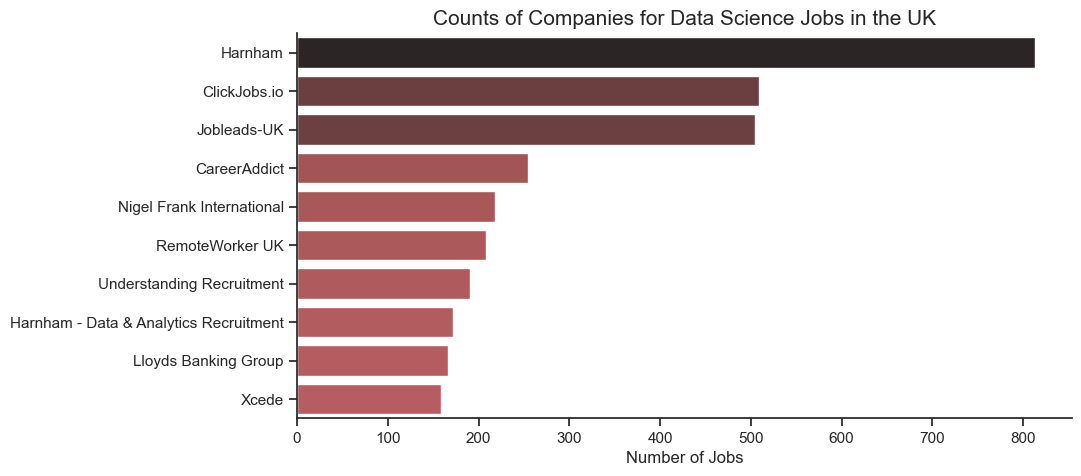

In [79]:
df_UK_plot = df_DA_UK['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
plt.figure(figsize=(10, 5))
sns.barplot(data=df_UK_plot, x='count', y='company_name', hue='count', palette='dark:r_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Science Jobs in the UK', fontsize= 15)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunites

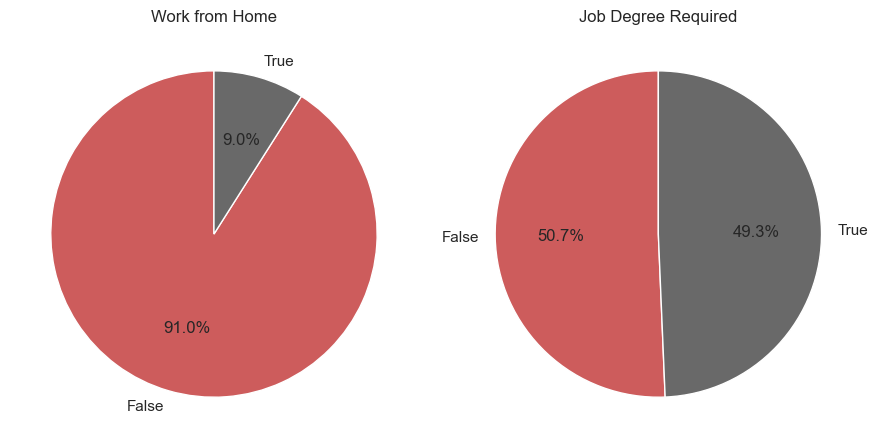

In [76]:
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Required',
}

fig, ax = plt.subplots(1,2, figsize=(9,5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_UK[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'], colors=['indianred','dimgrey'])
    ax[i].set_title(title)

fig.tight_layout()
plt.show()

### Potential Salary to be Expected

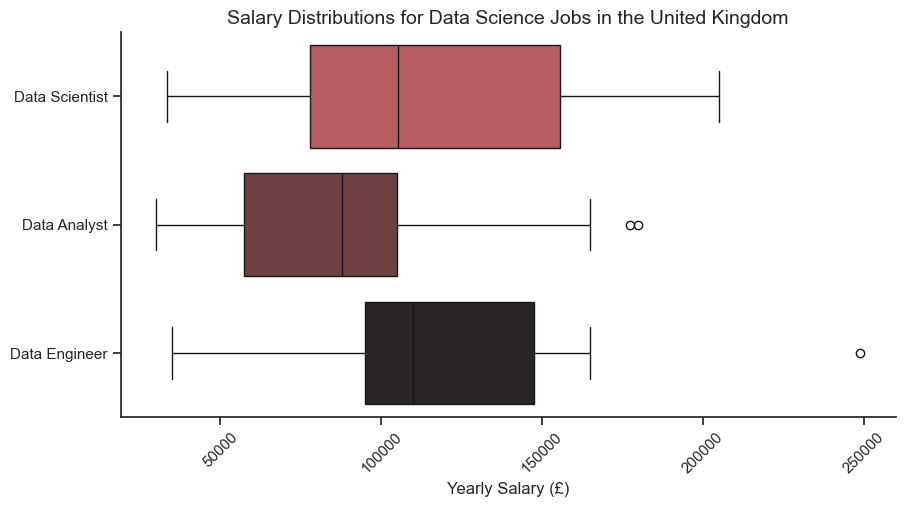

In [78]:
df_DA_UK_drop = df_DA_UK.dropna(subset=['salary_year_avg']).copy()

sns.set_theme(style="ticks")
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_DA_UK_drop, x='salary_year_avg', y='job_title_short', hue='job_title_short', palette='dark:r_r', legend=False)
sns.despine()
plt.title('Salary Distributions for Data Science Jobs in the United Kingdom', fontsize=14)
plt.xlabel('Yearly Salary (£)', fontsize=12)
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()